In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import lxml

from sklearn.linear_model import LinearRegression

## Load data
doncic = "https://www.basketball-reference.com/players/d/doncilu01.html"
lebron = 'https://www.basketball-reference.com/players/j/jamesle01.html'

doncic_df = pd.read_html(doncic, header=0)[0]
lebron_df = pd.read_html(lebron, header=0)[0]

import warnings
warnings.filterwarnings("ignore")


In [2]:
age = [18,19,20,21,22,23]
doncic_df['age'] = age
doncic_df = doncic_df.head(5)
lebron_df = lebron_df.head(19)

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,age
0,2018-19,19.0,DAL,NBA,SG,72,72,32.2,7.0,16.5,...,1.2,6.6,7.8,6.0,1.1,0.3,3.4,1.9,21.2,18
1,2019-20,20.0,DAL,NBA,PG,61,61,33.6,9.5,20.6,...,1.3,8.1,9.4,8.8,1.0,0.2,4.3,2.5,28.8,19
2,2020-21,21.0,DAL,NBA,PG,66,66,34.3,9.8,20.5,...,0.8,7.2,8.0,8.6,1.0,0.5,4.3,2.3,27.7,20
3,2021-22,22.0,DAL,NBA,PG,65,65,35.4,9.9,21.6,...,0.9,8.3,9.1,8.7,1.2,0.6,4.5,2.2,28.4,21
4,2022-23,23.0,DAL,NBA,PG,50,50,36.5,11.2,22.2,...,0.9,7.9,8.8,8.1,1.5,0.5,3.7,2.7,33.3,22


In [3]:
lebron_df = lebron_df.head(19)
lebron_df

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2003-04,19.0,CLE,NBA,SG,79.0,79.0,39.5,7.9,18.9,...,0.754,1.3,4.2,5.5,5.9,1.6,0.7,3.5,1.9,20.9
1,2004-05,20.0,CLE,NBA,SF,80.0,80.0,42.4,9.9,21.1,...,0.750,1.4,6.0,7.4,7.2,2.2,0.7,3.3,1.8,27.2
2,2005-06,21.0,CLE,NBA,SF,79.0,79.0,42.5,11.1,23.1,...,0.738,0.9,6.1,7.0,6.6,1.6,0.8,3.3,2.3,31.4
3,2006-07,22.0,CLE,NBA,SF,78.0,78.0,40.9,9.9,20.8,...,0.698,1.1,5.7,6.7,6.0,1.6,0.7,3.2,2.2,27.3
4,2007-08,23.0,CLE,NBA,SF,75.0,74.0,40.4,10.6,21.9,...,0.712,1.8,6.1,7.9,7.2,1.8,1.1,3.4,2.2,30.0
5,2008-09,24.0,CLE,NBA,SF,81.0,81.0,37.7,9.7,19.9,...,0.780,1.3,6.3,7.6,7.2,1.7,1.1,3.0,1.7,28.4
6,2009-10,25.0,CLE,NBA,SF,76.0,76.0,39.0,10.1,20.1,...,0.767,0.9,6.4,7.3,8.6,1.6,1.0,3.4,1.6,29.7
7,2010-11,26.0,MIA,NBA,SF,79.0,79.0,38.8,9.6,18.8,...,0.759,1.0,6.5,7.5,7.0,1.6,0.6,3.6,2.1,26.7
8,2011-12,27.0,MIA,NBA,SF,62.0,62.0,37.5,10.0,18.9,...,0.771,1.5,6.4,7.9,6.2,1.9,0.8,3.4,1.5,27.1
9,2012-13,28.0,MIA,NBA,PF,76.0,76.0,37.9,10.1,17.8,...,0.753,1.3,6.8,8.0,7.3,1.7,0.9,3.0,1.4,26.8


# LeBron : +38k and counting! 
## The question here is who can top this? Is there anyone on track to break this record?

Total Season thus far
19


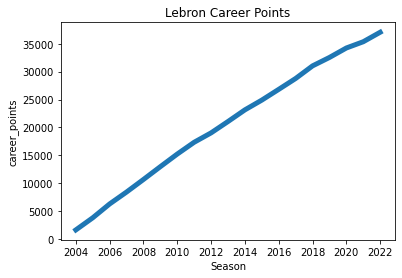

In [4]:
lebron_df['Season'] = pd.to_datetime(lebron_df['Season'], format='%Y-%y')
lebron_df['total_points_per_season'] = lebron_df['PTS'] * lebron_df['G']
lebron_df['career_points'] = lebron_df['total_points_per_season'].cumsum()
lebron_df['Player'] = 'Lebron James'

sns.lineplot(data=lebron_df, x='Season',y='career_points', linewidth=5)

plt.title("Lebron Career Points")
print("Total Season thus far")
print(len(lebron_df))

In [12]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Step 1: Data collection and cleaning
# Collect data for historical points per game and games played per season

# Create a new column with the running total of points scored by the player
doncic_df['total_points'] = doncic_df['PTS'] * doncic_df['G']

# Create a new column with the player's age

# Select the features and target variables
X = doncic_df[['age', 'G']]
y = doncic_df['total_points']

# Fit a linear regression model to the data
model = LinearRegression()
model.fit(X, y)

# Predict the total points for the player for the next 10 seasons
seasons = pd.DataFrame({'Season': ['2023-24', '2024-25', '2025-26', '2026-27',
                                   '2027-28', '2028-29', '2029-30', '2030-31', '2031-32',
                                   '2032-33','2033-34','2034-35','2035-36','2036-37']})

predicted_age = [23,24,25,26,27,28,29,30,31,32,33,34,35,36]
seasons['age'] = predicted_age
seasons['G'] = doncic_df['G'].mean()
seasons['total_points'] = model.predict(seasons[['age', 'G']])

# Create a new dataframe with the actuals and predictions for the player
predictions = doncic_df[['Season', 'total_points']].append(seasons[['Season', 'total_points']])
predictions = predictions.sort_values('Season').reset_index(drop=True)
predictions['Player'] = 'Luka Doncic'
predictions['career_points'] = predictions['total_points'].cumsum()
# Print the dataframe with the actuals and predictions for the player
print(predictions)

     Season  total_points       Player  career_points
0   2018-19   1526.400000  Luka Doncic    1526.400000
1   2019-20   1756.800000  Luka Doncic    3283.200000
2   2020-21   1828.200000  Luka Doncic    5111.400000
3   2021-22   1846.000000  Luka Doncic    6957.400000
4   2022-23   1665.000000  Luka Doncic    8622.400000
5   2023-24   1940.656180  Luka Doncic   10563.056180
6   2024-25   2012.714906  Luka Doncic   12575.771086
7   2025-26   2084.773633  Luka Doncic   14660.544719
8   2026-27   2156.832360  Luka Doncic   16817.377079
9   2027-28   2228.891086  Luka Doncic   19046.268165
10  2028-29   2300.949813  Luka Doncic   21347.217978
11  2029-30   2373.008539  Luka Doncic   23720.226517
12  2030-31   2445.067266  Luka Doncic   26165.293783
13  2031-32   2517.125993  Luka Doncic   28682.419775
14  2032-33   2589.184719  Luka Doncic   31271.604494
15  2033-34   2661.243446  Luka Doncic   33932.847940
16  2034-35   2733.302172  Luka Doncic   36666.150112
17  2035-36   2805.360899  L

Total Season's played thus far
19


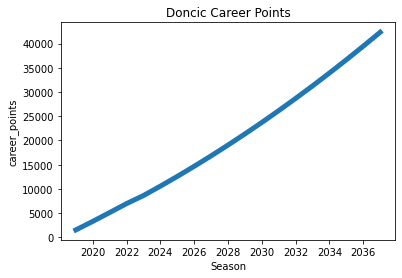

In [13]:
predictions['Season'] = pd.to_datetime(predictions['Season'], format='%Y-%y')
sns.lineplot(data=predictions, x='Season',y='career_points', linewidth=5)

plt.title("Doncic Career Points")
print("Total Season's played thus far")
print(len(predictions))

In [7]:
predictions

,Season,total_points,player,career_points
0,2019-01-01,1526.400000,Luka Doncic,1526.400000
1,2020-01-01,1756.800000,Luka Doncic,3283.200000
2,2021-01-01,1828.200000,Luka Doncic,5111.400000
3,2022-01-01,1846.000000,Luka Doncic,6957.400000
4,2023-01-01,1665.000000,Luka Doncic,8622.400000
5,2024-01-01,1940.656180,Luka Doncic,10563.056180
6,2025-01-01,2012.714906,Luka Doncic,12575.771086
7,2026-01-01,2084.773633,Luka Doncic,14660.544719
8,2027-01-01,2156.832360,Luka Doncic,16817.377079
9,2028-01-01,2228.891086,Luka Doncic,19046.268165


In [8]:
season_cnt = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15, 16,17,18,19]

lebron_df['season_number'] = season_cnt
predictions['season_number'] = season_cnt

In [17]:
cols = ['Player','season_number','career_points']

lebron_clean = lebron_df[cols]

final = pd.concat([lebron_clean, predictions[cols]])


<AxesSubplot:xlabel='season_number', ylabel='career_points'>

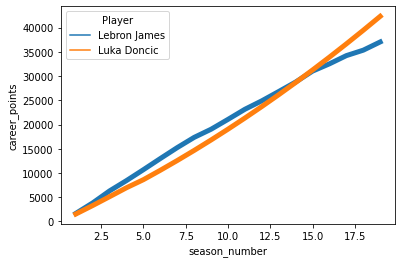

In [25]:
sns.lineplot(data=final.reset_index(), x='season_number',y='career_points', hue='Player', linewidth=5)